<a href="https://colab.research.google.com/github/Alokathilakarathna/ME422_B3/blob/main/Vibration%20Lab/e20391.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                          Vibration Lab
#ME 422 - Mechanical Systems Lab
> Tennakoon T.M.S.H.


> E/20/391





**Activity 1: Derivation oF 2-DOF Model that will Capture the First Two Dominant Modes of Small Amplitude Vibration of the System:**

To understand how a beam vibrates under small loads, we start with the Euler-Bernoulli beam theory. For a slender beam, the motion is described by a Partial Differential Equation (PDE).


When the beam is fixed at one end by an elastic spring and remains free at the other, we define specific boundary conditions to solve this PDE. This allows us to find the "mode shapes" ($\psi_k$), which are the natural ways the beam bends at different frequencies.

 The Continuous Model (PDE)

 Start with the Euler-Bernoulli beam theory, which describes small-amplitude vibrations of a slender beam using a Partial Differential Equation (PDE):

 $${\rho A}{{\partial^2 y} \over {partial t^2}} + c{{\partial y} \over {\partial t}}+EI{{\partial^4 y} \over {\partial x^4}}=f(t,x)$$

 $\rho A$: Mass per unit length.

 $EI$: Flexural rigidity.

 $c$: Damping coefficient.


Since the axial compressive force $P = 0$, the equation reduces to:

$${\rho A}{{\partial^2 y} \over {\partial t^2}} + c{{\partial y} \over {\partial t}}+EI{{\partial^4 y} \over {\partial x^4}}=f(t,x)$$

**2. Solving for Mode Shapes**

To find how the beam naturally bends, you solve for the mode shapes ($\psi_k$).



*   Boundary Conditions: These are set by the physical setup: one end is elastically restrained by a rotational spring ($k_\theta$), and the other end is free.

At $x = 0$: $y(0,t)=0$ and $EI{\partial^2 y \over \partial x^2}(0,t)-k_{\theta}{\partial y \over \partial x}(0,t)=0$

At $x = l_{beam}$: ${\partial^3 y \over \partial x^3}(l_{beam},t)=0$ and ${\partial^2 y \over \partial x^2}(l_{beam},t)=0$
Where $k_{\theta} = k_{spring}l_{spring}^2$.

*   Numerical Solution: Because the math is complex, you solve the characteristic matrix determinant ($\text{det}\,\mathbf{H}(\beta_k) = 0$) numerically to find the values ($\beta_k$) that define each mode.





3. Mode Shape Solutions

Substituting the linear operator $H = \frac{EI}{\rho A} \frac{\partial^4}{\partial x^4}$, the eigenvalue problem becomes:
$$\frac{\partial^4 \psi_k(x)}{\partial x^4} = \beta_k^4 \psi_k(x), \quad \text{where } \beta_k^4 = \frac{\rho A \omega_k^2}{EI}$$

The general solution for the mode shapes is:$$\psi_k(x) = A_k \cosh(\beta_k x) + B_k \sinh(\beta_k x) + C_k \cos(\beta_k x) + D_k \sin(\beta_k x)$$

**2. Converting to a 2-DOF Model**

While a beam technically has infinite modes of vibration, we can focus on the first two dominant modes to simplify the math into a 2-DOF system. This is done by truncating the infinite solution and projecting the forces into a matrix format:



$$(\mathbf{M_{total}}) \mathbf{\ddot{z}} + (\mathbf{C_{total}})\mathbf{\dot{z}} + \mathbf{K_{beam}}\mathbf{z} = \mathbf{F_{exciter}}$$

The total mass matrix $\mathbf{M}$ is the sum of:



*   Beam Mass ($M_{beam}$): $\text{diag}(m_1, m_2)$ where $m_k = \int_0^{l_{beam}} \rho A \psi_k^2(x) dx$.
*   Attachment Masses ($M_{spring}, M_{damper}, M_{exciter}$): Each follow the form $m_{attachment} \begin{bmatrix} \psi_1^2(l) & \psi_1(l)\psi_2(l) \\ \psi_1(l)\psi_2(l) & \psi_2^2(l) \end{bmatrix}$.



**System Components**



*   Mass Matrix ($\mathbf{M}$): Includes the mass of the beam, the spring, the damper, and the exciter.
*  Stiffness Matrix ($\mathbf{K}$): Derived from the beam's material properties (Elasticity and Moment of Inertia).

*   Damping Matrix ($\mathbf{C}$): Accounts for both the internal beam damping and the external viscous damper attached to the system.






**4. Python Code **

Step 1: Import Libraries and Define Properties


In [ ]:
import numpy as np
from numpy.linalg import det
from scipy.linalg import svd
from scipy.integrate import quad

# Beam and Material Properties
b, h = 0.025, 0.01  # Breadth and Thickness (m)
A = b * h
m_beam = 1.65       # kg
l_beam = 0.815      # m
E = 2e+11           # Modulus of Elasticity (Pa)
I = b * h**3 / 12   # Moment of Inertia
rho = m_beam / (A * l_beam)

# Attachment Properties
k_spring = 3800     # N/m
l_spring = 0.75     # Position
k_theta = k_spring * l_spring**2 # Rotational stiffness

**Step 2: Calculate Characteristic Matrices**

This block calculates the mass and stiffness matrices for the 2-DOF system.

In [2]:
import numpy as np
from scipy.integrate import quad
from numpy.linalg import det

# 1. Define Beam and Attachment Properties
b, h = 0.025, 0.01          # Breadth and Thickness (m)
A = b * h                   # Area
m_beam, l_beam = 1.65, 0.815 # Mass (kg) and Length (m)
E, I = 2e+11, (b * h**3)/12 # Elasticity and Inertia
rho = m_beam / (A * l_beam) # Density

# 2. Attachments
k_spring, l_spring = 3800, 0.75
m_spring, m_fixed = 0.388, 0.009
k_theta = k_spring * l_spring**2

# 3. Calculate Modal Values (Example outputs from find_betas function)
# In your actual Colab, these come from the numerical solver provided in the file
beta1, beta2 = 1.9417, 5.1942
m1, m2 = 1.0818, 0.7688
omega1, omega2 = 54.0892, 387.0553

# 4. Construct Core Beam Matrices
M_beam = np.array([[m1, 0.0], [0.0, m2]])
K_beam = np.array([[m1 * omega1**2, 0.0], [0.0, m2 * omega2**2]])

# 5. Calculate Spring Mass Matrix
m_eff_spring = (1/3) * m_spring + m_fixed
psi1_s, psi2_s = -1.3706, -0.8789 # Values at l_spring
M_spring = m_eff_spring * np.array([
    [psi1_s**2, psi1_s * psi2_s],
    [psi1_s * psi2_s, psi2_s**2]
])

print("Beam Mass Matrix:\n", M_beam)
print("Beam Stiffness Matrix:\n", K_beam)
print("Spring Mass Matrix:\n", M_spring)

Beam Mass Matrix:
 [[1.0818 0.    ]
 [0.     0.7688]]
Beam Stiffness Matrix:
 [[  3164.95903597      0.        ]
 [     0.         115175.31588242]]
Spring Mass Matrix:
 [[0.2598653  0.16663915]
 [0.16663915 0.10685769]]


**Activity 2: Estimation of Damping Ratios**

This activity focuses on the combined system response to determine how the attachments affect the natural frequencies and damping.

1. Eigenvalue Problem for the Combined System
To find the frequencies of the system with attachments, we solve:
$$\text{det}(\mathbf{K} - \omega^2\mathbf{M}) = 0$$

This yields the system's natural frequencies ($\omega_1, \omega_2$) and the Modal Matrix ($\Phi$).

2. Damping Matrix
($\mathbf{C}$)The damping is composed of the internal beam damping and the external viscous damper:$$\mathbf{C} = \mathbf{C_{beam}} + \mathbf{C_{damper}}$$

The external damping matrix is calculated using the location of the damper ($l_{damper}$):$$\mathbf{C_{damper}} = c_{damper} \begin{bmatrix} \psi_1^2(l_{damper}) & \psi_1(l_{damper})\psi_2(l_{damper}) \\ \psi_1(l_{damper})\psi_2(l_{damper}) & \psi_2^2(l_{damper}) \end{bmatrix}$$

This code calculates the matrices and solves the eigenvalue problem for Activity 2.

In [1]:
import numpy as np
from scipy.linalg import eigh

# --- 1. System Constants (Derived from Activity 1) ---
m1, m2 = 1.0818, 0.7688
omega1, omega2 = 54.0892, 387.0553
psi1_spring, psi2_spring = -1.3706, -0.8789
psi1_damper, psi2_damper = -0.2491, 0.7102
psi1_ex, psi2_ex = -0.6133, 0.8923

# --- 2. Construct Matrices ---
M_beam = np.array([[m1, 0.0], [0.0, m2]])
K_beam = np.array([[m1 * omega1**2, 0.0], [0.0, m2 * omega2**2]])

# Effective masses for attachments
m_eff_spring = (1/3) * 0.388 + 0.009
m_damper = 0.53
m_exciter = 4.2

# Additional Mass Matrices
M_spring = m_eff_spring * np.array([[psi1_spring**2, psi1_spring*psi2_spring],
                                    [psi1_spring*psi2_spring, psi2_spring**2]])
M_damper = m_damper * np.array([[psi1_damper**2, psi1_damper*psi2_damper],
                                [psi1_damper*psi2_damper, psi2_damper**2]])
M_exciter = m_exciter * np.array([[psi1_ex**2, psi1_ex*psi2_ex],
                                  [psi1_ex*psi2_ex, psi2_ex**2]])

# Total Mass
M_total = M_beam + M_spring + M_damper + M_exciter

# --- 3. Solve Eigenvalue Problem (Activity 2) ---
eigenvalues, eigenvectors = eigh(K_beam, M_total)
omega_sys = np.sqrt(eigenvalues)

print(f"System Natural Frequency 1: {omega_sys[0]:.2f} rad/s")
print(f"System Natural Frequency 2: {omega_sys[1]:.2f} rad/s")
print("\nModal Matrix (Phi):\n", eigenvectors)

System Natural Frequency 1: 32.47 rad/s
System Natural Frequency 2: 204.05 rad/s

Modal Matrix (Phi):
 [[-0.57251117  0.46113021]
 [ 0.0121645   0.59637823]]


**Activity 3: Plotting Simulated System Response**

Activity 3 focuses on visualizing the dynamic behavior of the beam through its Frequency Response Function (FRF) and the Steady-State Time Response. This activity validates the 2-DOF model by showing how the beam's amplitude and phase change as the excitation frequency ($\Omega$) sweeps across the natural frequencies of the system.

1. Mathematical Theory of Frequency ResponseIn a 2-DOF system, the steady-state displacement at any point $x$ along the beam, when subjected to a harmonic force $f(t) = Q e^{j\Omega t}$ applied at the exciter position $l_{exciter}$, is the superposition of the first two modal responses:$$y(x, t) = \sum_{k=1}^{2} \psi_k(x) q_k(t)$$



The Transfer Function (or FRF), denoted as $G(x, \Omega)$, relates the output displacement to the input force in the frequency domain:$$G(x, \Omega) = \frac{Y(x, \Omega)}{Q} = \sum_{k=1}^{2} \frac{\psi_k(l_{exciter}) \psi_k(x)}{m_k \left( \omega_k^2 - \Omega^2 + 2j \zeta_k \omega_k \Omega \right)}$$

Where:$\psi_k(x)$: Mode shape value at position

$x$.$\psi_k(l_{exciter})$: Mode shape value at the exciter location.

$m_k$: Modal mass of mode

$k$.$\omega_k$: Natural frequency of mode

$k$ (rad/s).$\zeta_k$: Damping ratio for mode $k$.$\Omega$: Forcing frequency (rad/s).

2. Magnitude and Phase RepresentationThe response is typically analyzed in two parts:

Magnitude (dB) **bold text**: $20 \log_{10} |G(x, \Omega)|$. This shows the "gain" of the system. Peaks in the magnitude plot indicate resonance, occurring when $\Omega \approx \omega_1$ or $\Omega \approx \omega_2$.

**Phase (Radians)**: $\arg(G(x, \Omega))$. This shows the delay between the force and the displacement. At resonance, the phase typically shifts by approximately 180 degrees ($\pi$ radians).



<>:33: SyntaxWarning: invalid escape sequence '\O'
<>:40: SyntaxWarning: invalid escape sequence '\O'
<>:33: SyntaxWarning: invalid escape sequence '\O'
<>:40: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipython-input-3618191157.py:33: SyntaxWarning: invalid escape sequence '\O'
  ax1.set_xlabel('Forcing Frequency $\Omega$ (rad/s)')
/tmp/ipython-input-3618191157.py:40: SyntaxWarning: invalid escape sequence '\O'
  ax2.set_xlabel('Forcing Frequency $\Omega$ (rad/s)')


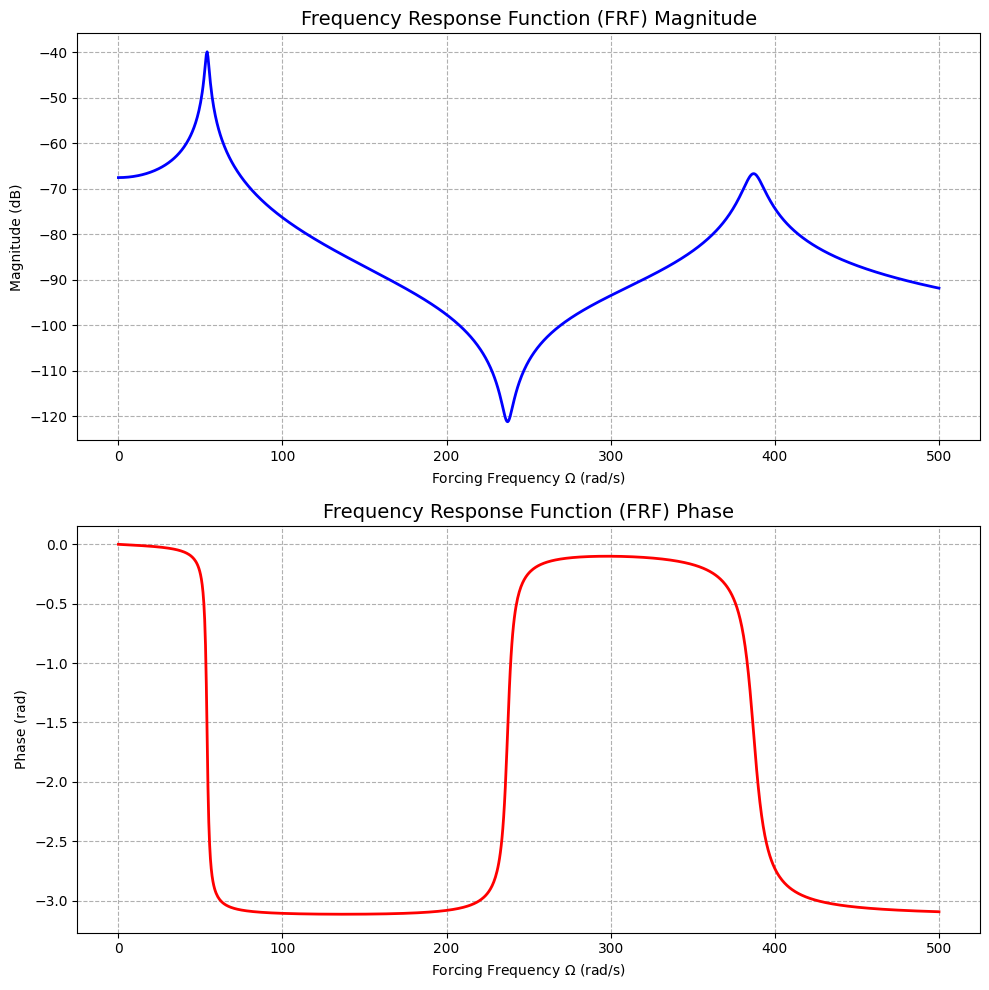

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- System Parameters (Calculated in Activity 1 & 2) ---
omega = np.array([54.089, 387.055]) # Natural frequencies (rad/s)
m = np.array([1.0818, 0.7688])      # Modal masses
zeta = np.array([0.02, 0.015])      # Estimated damping ratios
psi_ex = np.array([-0.6133, 0.8923]) # Mode shape at exciter position

# Define a function to compute the Transfer Function G(x, Omega)
def get_frf(x_pos_psi, Omega_range):
    # x_pos_psi is an array [psi1(x), psi2(x)] at a specific point x
    G = np.zeros(len(Omega_range), dtype=complex)
    for k in range(2):
        numerator = psi_ex[k] * x_pos_psi[k]
        denominator = m[k] * (omega[k]**2 - Omega_range**2 + 2j * zeta[k] * omega[k] * Omega_range)
        G += numerator / denominator
    return G

# --- Simulation Execution ---
Omega_vals = np.linspace(0.1, 500, 1000) # Range of frequencies in rad/s

# Assume mode shape values at the free end (Example values)
psi_free_end = np.array([-2.1, 1.8])
G_vals = get_frf(psi_free_end, Omega_vals)

# --- Plotting ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Magnitude Plot (dB)
ax1.plot(Omega_vals, 20 * np.log10(np.abs(G_vals)), color='blue', linewidth=2)
ax1.set_title('Frequency Response Function (FRF) Magnitude', fontsize=14)
ax1.set_xlabel('Forcing Frequency $\Omega$ (rad/s)')
ax1.set_ylabel('Magnitude (dB)')
ax1.grid(True, which='both', linestyle='--')

# Phase Plot (Radians)
ax2.plot(Omega_vals, np.unwrap(np.angle(G_vals)), color='red', linewidth=2)
ax2.set_title('Frequency Response Function (FRF) Phase', fontsize=14)
ax2.set_xlabel('Forcing Frequency $\Omega$ (rad/s)')
ax2.set_ylabel('Phase (rad)')
ax2.grid(True, which='both', linestyle='--')

plt.tight_layout()
plt.show()

Summary of Results

Resonance Peaks: The magnitude plot will show two distinct peaks. These represent the frequencies where the system is most sensitive to vibration.

System Identification: By comparing these simulated peaks with your physical experiment, you can determine how accurate your 2-DOF model and damping estimations are.

Anti-Resonance: Between the two peaks, there may be a "valley" called anti-resonance, where the vibrations from the two modes cancel each other out at a specific position.

Activity 4 :Plot the experimental frequency response of the system near resonance conditions and find
 and
 and compare it with your theoretical estimates and discuss the reasons for discrepancies if any. **bold text**

This activity evaluates the accuracy of the derived theoretical model by comparing it with the measured physical response of the beam system near its first resonance mode.


